# Sales Analysis

## Importing the Necessary Libraries

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import calendar
import os

%matplotlib inline

## Task - 1

### Merge the 12 months of sale data into a single `.csv` file

In [2]:
ALL_MONTHS_DATA_FILE_NAME = "all_months_data.csv"

PATH_TO_ALL_SALES_DATA = os.path.join(".", "Datasets", "Sales_Data")

# Get a list of the .csv files in the PATH_TO_ALL_SALES_DATA folder
LIST_OF_MONTLY_SALES_DATA_FILES = os.listdir(PATH_TO_ALL_SALES_DATA)

if ALL_MONTHS_DATA_FILE_NAME in LIST_OF_MONTLY_SALES_DATA_FILES:
    LIST_OF_MONTLY_SALES_DATA_FILES.remove(ALL_MONTHS_DATA_FILE_NAME)

LIST_OF_MONTLY_SALES_DATA_FILES

['Sales_June_2019.csv',
 'Sales_April_2019.csv',
 'Sales_November_2019.csv',
 'Sales_February_2019.csv',
 'Sales_December_2019.csv',
 'Sales_September_2019.csv',
 'Sales_May_2019.csv',
 'Sales_August_2019.csv',
 'Sales_July_2019.csv',
 'Sales_January_2019.csv',
 'Sales_March_2019.csv',
 'Sales_October_2019.csv']

In [3]:
all_months_data = pd.DataFrame()

for i in LIST_OF_MONTLY_SALES_DATA_FILES:
    COMPLETE_PATH = os.path.join(PATH_TO_ALL_SALES_DATA, i)
    all_months_data = pd.concat([all_months_data, pd.read_csv(COMPLETE_PATH)], axis=0)

all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016"


### Saving the new combined DataFrame we just created

In [4]:
all_months_data.to_csv(os.path.join(PATH_TO_ALL_SALES_DATA, ALL_MONTHS_DATA_FILE_NAME), index=False)

### Reading the new combined DataFrame from the `.csv` file we just created

In [5]:
all_months_data = pd.read_csv(os.path.join(PATH_TO_ALL_SALES_DATA, ALL_MONTHS_DATA_FILE_NAME))

all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016"


In [6]:
all_months_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

### Number of Rows and Columns in the Data

In [7]:
print(f"{'Total number of rows in the combined dataset:':50} {all_months_data.shape[0]:>10}")
print(f"{'Total number of columns in the combined dataset:':50} {all_months_data.shape[1]:>10}")

Total number of rows in the combined dataset:          186850
Total number of columns in the combined dataset:            6


In [8]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016"


---

## Cleaning the Data

1. We are going the drop the rows the have `NaN`

In [9]:
help(all_months_data.isna().any)

Help on method any in module pandas.core.frame:

any(axis=0, bool_only=None, skipna=True, level=None, **kwargs) method of pandas.core.frame.DataFrame instance
    Return whether any element is True, potentially over an axis.
    
    Returns False unless there at least one element within a series or
    along a Dataframe axis that is True or equivalent (e.g. non-zero or
    non-empty).
    
    Parameters
    ----------
    axis : {0 or 'index', 1 or 'columns', None}, default 0
        Indicate which axis or axes should be reduced.
    
        * 0 / 'index' : reduce the index, return a Series whose index is the
          original column labels.
        * 1 / 'columns' : reduce the columns, return a Series whose index is the
          original index.
        * None : reduce all axes, return a scalar.
    
    bool_only : bool, default None
        Include only boolean columns. If None, will attempt to use everything,
        then use only boolean data. Not implemented for Series.
    s

In [10]:
all_months_data[all_months_data.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
339,NaN,NaN,NaN,NaN,NaN,NaN
630,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1136,NaN,NaN,NaN,NaN,NaN,NaN
1349,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
184390,NaN,NaN,NaN,NaN,NaN,NaN
184779,NaN,NaN,NaN,NaN,NaN,NaN
185239,NaN,NaN,NaN,NaN,NaN,NaN
185614,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
help(all_months_data.dropna)

Help on method dropna in module pandas.core.frame:

dropna(axis=0, how='any', thresh=None, subset=None, inplace=False) method of pandas.core.frame.DataFrame instance
    Remove missing values.
    
    See the :ref:`User Guide <missing_data>` for more on which values are
    considered missing, and how to work with missing data.
    
    Parameters
    ----------
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Determine if rows or columns which contain missing values are
        removed.
    
        * 0, or 'index' : Drop rows which contain missing values.
        * 1, or 'columns' : Drop columns which contain missing value.
    
        .. versionchanged:: 1.0.0
    
           Pass tuple or list to drop on multiple axes.
           Only a single axis is allowed.
    
    how : {'any', 'all'}, default 'any'
        Determine if row or column is removed from DataFrame, when we have
        at least one NA or all NA.
    
        * 'any' : If any NA values are present, dro

In [12]:
all_months_data = all_months_data.dropna(how='any')

all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016"


2. Find the Rows with the value `Or` as the First Two Letters of the `Order Date` Column and remove those Rows

Firstly a quick observation as to why we are doin this...

In [13]:
# Executing the below statement now causes errors as the data is not clean yet
# Uncomment and run this code cell before running the following code cells to check out the error message
# pd.to_datetime(all_months_data["Order Date"], format="%m/%d/%y %H:%M")

From the above error message looks like there are some rows in the DataFrame that have the value for the column `Order Date` set to the string ***Order Date*** itself.

This is a very interesting observation from the dataset, which tells us that the dataset is not clean!!

To fix this problem, let's find the Rows with the value `Or` as the First Two Letters of the `Order Date` Column and remove those Rows. 

The reason why we are only searching for `Or` is simply because in [Method - 1](http://localhost:8888/notebooks/Real%20World%20Data%20Analysis.ipynb#The-easy-method-(Method---1)) we are actually only using the first 2 letters of the `Order Date` Column so to maintain a broad search space, we are doing this.

Also no valid order date starts with the letters ***Or*** !

In [14]:
all_months_data.loc[all_months_data["Order Date"].str[:2] == "Or"].head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
158,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
990,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1679,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1684,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3126,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [15]:
all_months_data = all_months_data.loc[all_months_data["Order Date"].str[:2] != "Or"]

In [16]:
all_months_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186845,278792,AA Batteries (4-pack),1,3.84,10/12/19 04:32,"920 Adams St, San Francisco, CA 94016"
186846,278793,Wired Headphones,1,11.99,10/28/19 22:00,"161 Chestnut St, Los Angeles, CA 90001"
186847,278794,AA Batteries (4-pack),1,3.84,10/09/19 20:58,"346 Spruce St, San Francisco, CA 94016"
186848,278795,iPhone,1,700,10/31/19 17:21,"291 Hill St, Seattle, WA 98101"


#### Convert the Columns to the Correct Type

In [17]:
# all_months_data.loc[:, "Quantity Ordered"] = all_months_data.loc[:, "Quantity Ordered"].astype("int64")
# all_months_data.loc[:, "Price Each"] = all_months_data.loc[:, "Price Each"].astype("float64")

# or we could do
# pd.to_numeric() method automatically picks the right numeric type for us
all_months_data.loc[:, "Quantity Ordered"] = pd.to_numeric(all_months_data.loc[:, "Quantity Ordered"])
all_months_data.loc[:, "Price Each"] = pd.to_numeric(all_months_data.loc[:, "Price Each"])

all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.00,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016"


In [18]:
all_months_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

---

## Augment the data with additional columns

### Task 2: Add Month Column

#### The easy method (Method - 1)

In [19]:
all_months_data.loc[:, "Month (Method - 1)"] = all_months_data["Order Date"].str[:2]

all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month (Method - 1)
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",06
1,209922,Macbook Pro Laptop,1,1700.00,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",06
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001",06
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101",06
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016",06


In [20]:
all_months_data.loc[:, "Month (Method - 1)"]

0         06
1         06
2         06
3         06
4         06
          ..
186845    10
186846    10
186847    10
186848    10
186849    10
Name: Month (Method - 1), Length: 185950, dtype: object

#### Changing the type of the `Month (Method - 1)` column to `int32`

In [21]:
all_months_data.loc[:, "Month (Method - 1)"] = all_months_data.loc[:, "Month (Method - 1)"].astype("int32")

all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month (Method - 1)
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",6
1,209922,Macbook Pro Laptop,1,1700.00,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",6
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001",6
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101",6
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016",6


In [22]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month (Method - 1)
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",6
1,209922,Macbook Pro Laptop,1,1700.00,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",6
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001",6
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101",6
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016",6


#### The better method (Method - 2)

In [23]:
all_months_data.loc[:, "Order Date"] = pd.to_datetime(all_months_data["Order Date"],
                                                      format="%m/%d/%y %H:%M",
                                                      errors="coerce")

In [24]:
pd.DatetimeIndex(all_months_data["Order Date"]).month

Int64Index([ 6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
            ...
            10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
           dtype='int64', name='Order Date', length=185950)

In [25]:
all_months_data["Month (Method - 2)"] = pd.DatetimeIndex(all_months_data["Order Date"]).month

In [26]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month (Method - 1),Month (Method - 2)
0,209921,USB-C Charging Cable,1,11.95,2019-06-23 19:34:00,"950 Walnut St, Portland, ME 04101",6,6
1,209922,Macbook Pro Laptop,1,1700.00,2019-06-30 10:05:00,"80 4th St, San Francisco, CA 94016",6,6
2,209923,ThinkPad Laptop,1,999.99,2019-06-24 20:18:00,"402 Jackson St, Los Angeles, CA 90001",6,6
3,209924,27in FHD Monitor,1,149.99,2019-06-05 10:21:00,"560 10th St, Seattle, WA 98101",6,6
4,209925,Bose SoundSport Headphones,1,99.99,2019-06-25 18:58:00,"545 2nd St, San Francisco, CA 94016",6,6


## Add a sales Column

In [27]:
all_months_data.loc[:, "Sales"] = all_months_data.loc[:, "Quantity Ordered"] * all_months_data.loc[:, "Price Each"]

all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month (Method - 1),Month (Method - 2),Sales
0,209921,USB-C Charging Cable,1,11.95,2019-06-23 19:34:00,"950 Walnut St, Portland, ME 04101",6,6,11.95
1,209922,Macbook Pro Laptop,1,1700.00,2019-06-30 10:05:00,"80 4th St, San Francisco, CA 94016",6,6,1700.00
2,209923,ThinkPad Laptop,1,999.99,2019-06-24 20:18:00,"402 Jackson St, Los Angeles, CA 90001",6,6,999.99
3,209924,27in FHD Monitor,1,149.99,2019-06-05 10:21:00,"560 10th St, Seattle, WA 98101",6,6,149.99
4,209925,Bose SoundSport Headphones,1,99.99,2019-06-25 18:58:00,"545 2nd St, San Francisco, CA 94016",6,6,99.99


In [28]:
all_months_data.loc[all_months_data["Quantity Ordered"] > 1]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month (Method - 1),Month (Method - 2),Sales
23,209943,AAA Batteries (4-pack),3,2.99,2019-06-23 16:19:00,"158 Willow St, Los Angeles, CA 90001",6,6,8.97
31,209950,Wired Headphones,2,11.99,2019-06-01 18:03:00,"689 Walnut St, Los Angeles, CA 90001",6,6,23.98
37,209956,AA Batteries (4-pack),2,3.84,2019-06-26 15:23:00,"910 Jackson St, Seattle, WA 98101",6,6,7.68
47,209964,USB-C Charging Cable,2,11.95,2019-06-11 14:30:00,"822 8th St, Los Angeles, CA 90001",6,6,23.90
50,209967,AA Batteries (4-pack),2,3.84,2019-06-21 21:18:00,"584 Chestnut St, San Francisco, CA 94016",6,6,7.68
...,...,...,...,...,...,...,...,...,...
186771,278719,AAA Batteries (4-pack),3,2.99,2019-10-28 18:31:00,"382 Forest St, New York City, NY 10001",10,10,8.97
186804,278751,Wired Headphones,2,11.99,2019-10-31 07:49:00,"372 Hill St, Boston, MA 02215",10,10,23.98
186808,278755,Wired Headphones,2,11.99,2019-10-05 12:35:00,"507 Ridge St, Los Angeles, CA 90001",10,10,23.98
186815,278762,Wired Headphones,2,11.99,2019-10-19 23:09:00,"925 9th St, San Francisco, CA 94016",10,10,23.98


## Question 1: What was the best month for sales? How much was earned that month?

In [29]:
answer = all_months_data[["Month (Method - 1)", "Sales"]].groupby("Month (Method - 1)") \
                                                         .sum() \
                                                         .sort_values("Sales", ascending=False) \
                                                         .reset_index()  # Adds index column to the DataFrame

answer

,Month (Method - 1),Sales
0,12,4.613443e+06
1,10,3.736727e+06
2,4,3.390670e+06
3,11,3.199603e+06
4,5,3.152607e+06
5,3,2.807100e+06
6,7,2.647776e+06
7,6,2.577802e+06
8,8,2.244468e+06
9,2,2.202022e+06


In [30]:
BEST_SALES_MONTH_NUMBER = answer.loc[0, answer.columns][0].astype("int")
BEST_SALES_AMOUNT = answer.loc[0, answer.columns][1]

print(f"{'The best sales month was:':27} {calendar.month_name[BEST_SALES_MONTH_NUMBER]}")
print(f"{'The sales that month were:':27} ${BEST_SALES_AMOUNT:,.2f}")

The best sales month was:   December
The sales that month were:  $4,613,443.34


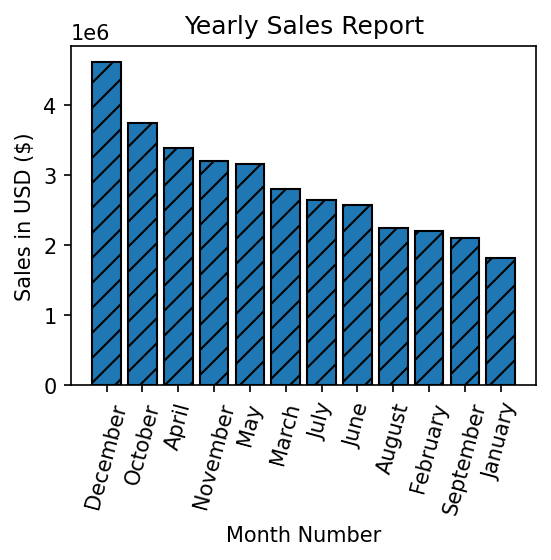

In [31]:
plt.figure(figsize=(4, 3), dpi=150)

X_AXIS_VALUES = [calendar.month_name[i] for i in answer["Month (Method - 1)"]]

bar_plot = plt.bar(X_AXIS_VALUES, answer["Sales"], edgecolor="black", linewidth=1)

for bar in bar_plot:
    bar.set_hatch("//")

plt.xticks(X_AXIS_VALUES, rotation='75')

plt.ylabel("Sales in USD ($)")    
plt.xlabel("Month Number")

plt.title("Yearly Sales Report")

plt.show()

## What city had the highest number of Sales?

In [32]:
all_months_data["City (Method - 1)"] = all_months_data.loc[:, "Purchase Address"].str.split(", ").str[1]

all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month (Method - 1),Month (Method - 2),Sales,City (Method - 1)
0,209921,USB-C Charging Cable,1,11.95,2019-06-23 19:34:00,"950 Walnut St, Portland, ME 04101",6,6,11.95,Portland
1,209922,Macbook Pro Laptop,1,1700.00,2019-06-30 10:05:00,"80 4th St, San Francisco, CA 94016",6,6,1700.00,San Francisco
2,209923,ThinkPad Laptop,1,999.99,2019-06-24 20:18:00,"402 Jackson St, Los Angeles, CA 90001",6,6,999.99,Los Angeles
3,209924,27in FHD Monitor,1,149.99,2019-06-05 10:21:00,"560 10th St, Seattle, WA 98101",6,6,149.99,Seattle
4,209925,Bose SoundSport Headphones,1,99.99,2019-06-25 18:58:00,"545 2nd St, San Francisco, CA 94016",6,6,99.99,San Francisco


### Another Method is using the `.apply()` method

In [33]:
def get_city(address):
    return address.split(", ")[1]


# Let's use .apply()
all_months_data["City (Method - 2)"] = all_months_data["Purchase Address"].apply(get_city)

all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month (Method - 1),Month (Method - 2),Sales,City (Method - 1),City (Method - 2)
0,209921,USB-C Charging Cable,1,11.95,2019-06-23 19:34:00,"950 Walnut St, Portland, ME 04101",6,6,11.95,Portland,Portland
1,209922,Macbook Pro Laptop,1,1700.00,2019-06-30 10:05:00,"80 4th St, San Francisco, CA 94016",6,6,1700.00,San Francisco,San Francisco
2,209923,ThinkPad Laptop,1,999.99,2019-06-24 20:18:00,"402 Jackson St, Los Angeles, CA 90001",6,6,999.99,Los Angeles,Los Angeles
3,209924,27in FHD Monitor,1,149.99,2019-06-05 10:21:00,"560 10th St, Seattle, WA 98101",6,6,149.99,Seattle,Seattle
4,209925,Bose SoundSport Headphones,1,99.99,2019-06-25 18:58:00,"545 2nd St, San Francisco, CA 94016",6,6,99.99,San Francisco,San Francisco


In [34]:
answer = all_months_data[["City (Method - 1)", "Sales"]].groupby("City (Method - 1)") \
                                                        .sum() \
                                                        .sort_values("Sales", ascending=False) \
                                                        .reset_index()

answer

,City (Method - 1),Sales
0,San Francisco,8.262204e+06
1,Los Angeles,5.452571e+06
2,New York City,4.664317e+06
3,Boston,3.661642e+06
4,Atlanta,2.795499e+06
5,Dallas,2.767975e+06
6,Seattle,2.747755e+06
7,Portland,2.320491e+06
8,Austin,1.819582e+06


In [35]:
BEST_SALES_CITY = answer.loc[0, answer.columns][0]
BEST_SALES_AMOUNT_FOR_CITY = answer.loc[0, answer.columns][1]

print(f"{'The city with sales was:':30} {BEST_SALES_CITY}")
print(f"{'The sales in that city were:':30} ${BEST_SALES_AMOUNT_FOR_CITY:,.2f}")

The city with sales was:       San Francisco
The sales in that city were:   $8,262,203.91


Now separating the sales according to the cities may not be the best idea, as there could be multiple cities with the same name but are in different states, such as **Portland** can be in **Oregon** or in **Maine**.

So in such cases grouping these geographically different cities as one would be incorrect and misleading.

So to solve this issue let's add another column containing the state for each row as well.

In [36]:
def get_state(address):
    return f"({address.split(', ')[2].split()[0]})"

In [37]:
get_state("950 Walnut St, Portland, ME 04101")

'(ME)'

In [38]:
all_months_data["State (Method - 1)"] = "(" + \
                                        all_months_data["Purchase Address"].str \
                                                                           .split(", ") \
                                                                           .str[2] \
                                                                           .str \
                                                                           .split() \
                                                                           .str[0] \
                                        + ")"

all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month (Method - 1),Month (Method - 2),Sales,City (Method - 1),City (Method - 2),State (Method - 1)
0,209921,USB-C Charging Cable,1,11.95,2019-06-23 19:34:00,"950 Walnut St, Portland, ME 04101",6,6,11.95,Portland,Portland,(ME)
1,209922,Macbook Pro Laptop,1,1700.00,2019-06-30 10:05:00,"80 4th St, San Francisco, CA 94016",6,6,1700.00,San Francisco,San Francisco,(CA)
2,209923,ThinkPad Laptop,1,999.99,2019-06-24 20:18:00,"402 Jackson St, Los Angeles, CA 90001",6,6,999.99,Los Angeles,Los Angeles,(CA)
3,209924,27in FHD Monitor,1,149.99,2019-06-05 10:21:00,"560 10th St, Seattle, WA 98101",6,6,149.99,Seattle,Seattle,(WA)
4,209925,Bose SoundSport Headphones,1,99.99,2019-06-25 18:58:00,"545 2nd St, San Francisco, CA 94016",6,6,99.99,San Francisco,San Francisco,(CA)


In [39]:
all_months_data["State (Method - 2)"] = all_months_data["Purchase Address"].apply(get_state)

all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month (Method - 1),Month (Method - 2),Sales,City (Method - 1),City (Method - 2),State (Method - 1),State (Method - 2)
0,209921,USB-C Charging Cable,1,11.95,2019-06-23 19:34:00,"950 Walnut St, Portland, ME 04101",6,6,11.95,Portland,Portland,(ME),(ME)
1,209922,Macbook Pro Laptop,1,1700.00,2019-06-30 10:05:00,"80 4th St, San Francisco, CA 94016",6,6,1700.00,San Francisco,San Francisco,(CA),(CA)
2,209923,ThinkPad Laptop,1,999.99,2019-06-24 20:18:00,"402 Jackson St, Los Angeles, CA 90001",6,6,999.99,Los Angeles,Los Angeles,(CA),(CA)
3,209924,27in FHD Monitor,1,149.99,2019-06-05 10:21:00,"560 10th St, Seattle, WA 98101",6,6,149.99,Seattle,Seattle,(WA),(WA)
4,209925,Bose SoundSport Headphones,1,99.99,2019-06-25 18:58:00,"545 2nd St, San Francisco, CA 94016",6,6,99.99,San Francisco,San Francisco,(CA),(CA)


In [40]:
answer = all_months_data[["Sales", "City (Method - 1)", "State (Method - 1)"]].groupby([
                                                                                "State (Method - 1)",
                                                                                "City (Method - 1)"
                                                                              ]) \
                                                                              .sum() \
                                                                              .sort_values("Sales", ascending=False) \
                                                                              .reset_index()

answer

,State (Method - 1),City (Method - 1),Sales
0,(CA),San Francisco,8.262204e+06
1,(CA),Los Angeles,5.452571e+06
2,(NY),New York City,4.664317e+06
3,(MA),Boston,3.661642e+06
4,(GA),Atlanta,2.795499e+06
5,(TX),Dallas,2.767975e+06
6,(WA),Seattle,2.747755e+06
7,(OR),Portland,1.870732e+06
8,(TX),Austin,1.819582e+06
9,(ME),Portland,4.497583e+05


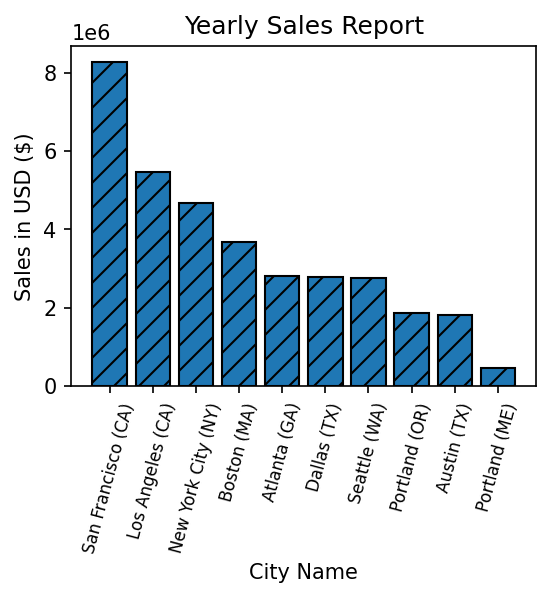

In [41]:
plt.figure(figsize=(4, 3), dpi=150)

X_AXIS_VALUES = (answer["City (Method - 1)"] + ' ' + answer["State (Method - 1)"]).unique()

bar_plot = plt.bar(X_AXIS_VALUES, answer["Sales"], edgecolor="black", linewidth=1)

for bar in bar_plot:
    bar.set_hatch("//")

plt.xticks(X_AXIS_VALUES, rotation="75", size=8)

plt.ylabel("Sales in USD ($)")    
plt.xlabel("City Name")

plt.title("Yearly Sales Report")

plt.show()

In [42]:
all_months_data["City (Method - 1)"] + ' ' + all_months_data["State (Method - 1)"]

0              Portland (ME)
1         San Francisco (CA)
2           Los Angeles (CA)
3               Seattle (WA)
4         San Francisco (CA)
                 ...        
186845    San Francisco (CA)
186846      Los Angeles (CA)
186847    San Francisco (CA)
186848          Seattle (WA)
186849      Los Angeles (CA)
Length: 185950, dtype: object

In [43]:
# The syntax is more clear in the .loc[] method now as well compared to before
BEST_SALES_CITY = answer.loc[0, "City (Method - 1)"] + ' ' + answer.loc[0, "State (Method - 1)"]
BEST_SALES_AMOUNT_FOR_CITY = answer.loc[0, "Sales"]

print(f"{'The city with sales was:':30} {BEST_SALES_CITY}")
print(f"{'The sales in that city were:':30} ${BEST_SALES_AMOUNT_FOR_CITY:,.2f}")

The city with sales was:       San Francisco (CA)
The sales in that city were:   $8,262,203.91


## Question 3: What time should we display advertisements to maximize the likelihood of customers buying our product(s)?

In [44]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month (Method - 1),Month (Method - 2),Sales,City (Method - 1),City (Method - 2),State (Method - 1),State (Method - 2)
0,209921,USB-C Charging Cable,1,11.95,2019-06-23 19:34:00,"950 Walnut St, Portland, ME 04101",6,6,11.95,Portland,Portland,(ME),(ME)
1,209922,Macbook Pro Laptop,1,1700.00,2019-06-30 10:05:00,"80 4th St, San Francisco, CA 94016",6,6,1700.00,San Francisco,San Francisco,(CA),(CA)
2,209923,ThinkPad Laptop,1,999.99,2019-06-24 20:18:00,"402 Jackson St, Los Angeles, CA 90001",6,6,999.99,Los Angeles,Los Angeles,(CA),(CA)
3,209924,27in FHD Monitor,1,149.99,2019-06-05 10:21:00,"560 10th St, Seattle, WA 98101",6,6,149.99,Seattle,Seattle,(WA),(WA)
4,209925,Bose SoundSport Headphones,1,99.99,2019-06-25 18:58:00,"545 2nd St, San Francisco, CA 94016",6,6,99.99,San Francisco,San Francisco,(CA),(CA)


In [45]:
all_months_data["Hour (Method - 1)"] = all_months_data["Order Date"].dt.hour  # dt means date
all_months_data["Minute (Method - 1)"] = all_months_data["Order Date"].dt.minute  # dt means date

all_months_data["Hour (Method - 2)"] = pd.DatetimeIndex(all_months_data["Order Date"]).hour
all_months_data["Minute (Method - 2)"] = pd.DatetimeIndex(all_months_data["Order Date"]).minute

all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month (Method - 1),Month (Method - 2),Sales,City (Method - 1),City (Method - 2),State (Method - 1),State (Method - 2),Hour (Method - 1),Minute (Method - 1),Hour (Method - 2),Minute (Method - 2)
0,209921,USB-C Charging Cable,1,11.95,2019-06-23 19:34:00,"950 Walnut St, Portland, ME 04101",6,6,11.95,Portland,Portland,(ME),(ME),19,34,19,34
1,209922,Macbook Pro Laptop,1,1700.00,2019-06-30 10:05:00,"80 4th St, San Francisco, CA 94016",6,6,1700.00,San Francisco,San Francisco,(CA),(CA),10,5,10,5
2,209923,ThinkPad Laptop,1,999.99,2019-06-24 20:18:00,"402 Jackson St, Los Angeles, CA 90001",6,6,999.99,Los Angeles,Los Angeles,(CA),(CA),20,18,20,18
3,209924,27in FHD Monitor,1,149.99,2019-06-05 10:21:00,"560 10th St, Seattle, WA 98101",6,6,149.99,Seattle,Seattle,(WA),(WA),10,21,10,21
4,209925,Bose SoundSport Headphones,1,99.99,2019-06-25 18:58:00,"545 2nd St, San Francisco, CA 94016",6,6,99.99,San Francisco,San Francisco,(CA),(CA),18,58,18,58


In [46]:
all_months_data.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month (Method - 1),Month (Method - 2),Sales,City (Method - 1),City (Method - 2),State (Method - 1),State (Method - 2),Hour (Method - 1),Minute (Method - 1),Hour (Method - 2),Minute (Method - 2)
186845,278792,AA Batteries (4-pack),1,3.84,2019-10-12 04:32:00,"920 Adams St, San Francisco, CA 94016",10,10,3.84,San Francisco,San Francisco,(CA),(CA),4,32,4,32
186846,278793,Wired Headphones,1,11.99,2019-10-28 22:00:00,"161 Chestnut St, Los Angeles, CA 90001",10,10,11.99,Los Angeles,Los Angeles,(CA),(CA),22,0,22,0
186847,278794,AA Batteries (4-pack),1,3.84,2019-10-09 20:58:00,"346 Spruce St, San Francisco, CA 94016",10,10,3.84,San Francisco,San Francisco,(CA),(CA),20,58,20,58
186848,278795,iPhone,1,700.00,2019-10-31 17:21:00,"291 Hill St, Seattle, WA 98101",10,10,700.00,Seattle,Seattle,(WA),(WA),17,21,17,21
186849,278796,Wired Headphones,1,11.99,2019-10-13 11:20:00,"547 Jefferson St, Los Angeles, CA 90001",10,10,11.99,Los Angeles,Los Angeles,(CA),(CA),11,20,11,20


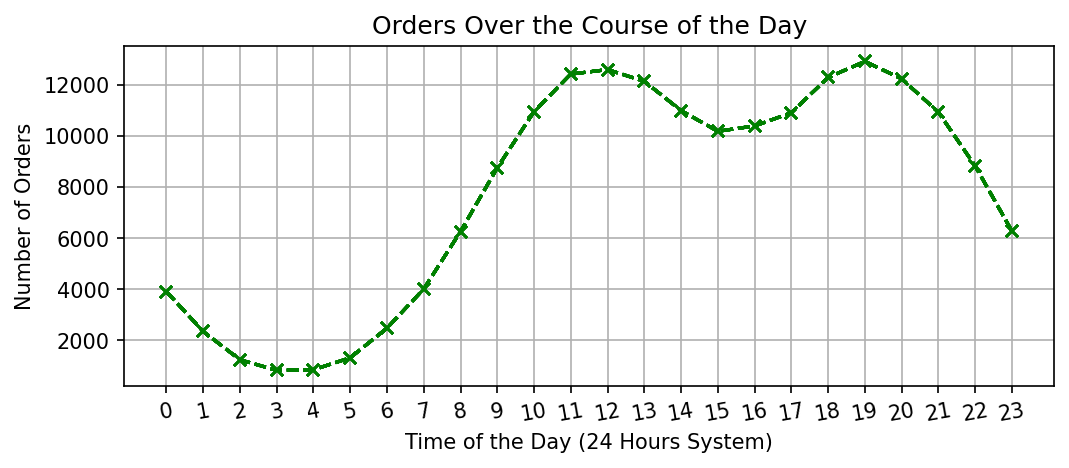

In [47]:
plt.figure(figsize=(8, 3), dpi=150)

X_AXIS_VALUES = [hour for hour, df in all_months_data.groupby("Hour (Method - 1)")]

plt.plot(X_AXIS_VALUES, all_months_data.groupby("Hour (Method - 1)").count(), "gx--")

plt.title("Orders Over the Course of the Day")
plt.ylabel("Number of Orders")
plt.xlabel("Time of the Day (24 Hours System)")

plt.xticks(X_AXIS_VALUES, rotation='10')

plt.grid()

plt.show()

## Question 4: What products are most often sold together?

**Quick Note**: Items sold together share the same `Order ID` and quite logically `Purchase Address`

In [48]:
help(all_months_data.duplicated)

Help on method duplicated in module pandas.core.frame:

duplicated(subset: Union[Hashable, Sequence[Hashable], NoneType] = None, keep: Union[str, bool] = 'first') -> 'Series' method of pandas.core.frame.DataFrame instance
    Return boolean Series denoting duplicate rows.
    
    Considering certain columns is optional.
    
    Parameters
    ----------
    subset : column label or sequence of labels, optional
        Only consider certain columns for identifying duplicates, by
        default use all of the columns.
    keep : {'first', 'last', False}, default 'first'
        Determines which duplicates (if any) to mark.
    
        - ``first`` : Mark duplicates as ``True`` except for the first occurrence.
        - ``last`` : Mark duplicates as ``True`` except for the last occurrence.
        - False : Mark all duplicates as ``True``.
    
    Returns
    -------
    Series



In [49]:
sold_together_df = all_months_data.loc[all_months_data["Order ID"].duplicated(keep=False)].reset_index(drop=True)

sold_together_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month (Method - 1),Month (Method - 2),Sales,City (Method - 1),City (Method - 2),State (Method - 1),State (Method - 2),Hour (Method - 1),Minute (Method - 1),Hour (Method - 2),Minute (Method - 2)
0,209938,iPhone,1,700.00,2019-06-15 12:29:00,"766 Meadow St, Seattle, WA 98101",6,6,700.00,Seattle,Seattle,(WA),(WA),12,29,12,29
1,209938,Wired Headphones,1,11.99,2019-06-15 12:29:00,"766 Meadow St, Seattle, WA 98101",6,6,11.99,Seattle,Seattle,(WA),(WA),12,29,12,29
2,209949,Google Phone,1,600.00,2019-06-23 07:45:00,"637 12th St, San Francisco, CA 94016",6,6,600.00,San Francisco,San Francisco,(CA),(CA),7,45,7,45
3,209949,USB-C Charging Cable,1,11.95,2019-06-23 07:45:00,"637 12th St, San Francisco, CA 94016",6,6,11.95,San Francisco,San Francisco,(CA),(CA),7,45,7,45
4,209960,USB-C Charging Cable,1,11.95,2019-06-22 11:53:00,"333 Sunset St, Dallas, TX 75001",6,6,11.95,Dallas,Dallas,(TX),(TX),11,53,11,53


In [50]:
sold_together_df["Grouped"] = sold_together_df.groupby("Order ID")["Product"].transform(lambda x: ", ".join(x))

sold_together_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month (Method - 1),Month (Method - 2),Sales,City (Method - 1),City (Method - 2),State (Method - 1),State (Method - 2),Hour (Method - 1),Minute (Method - 1),Hour (Method - 2),Minute (Method - 2),Grouped
0,209938,iPhone,1,700.00,2019-06-15 12:29:00,"766 Meadow St, Seattle, WA 98101",6,6,700.00,Seattle,Seattle,(WA),(WA),12,29,12,29,"iPhone, Wired Headphones"
1,209938,Wired Headphones,1,11.99,2019-06-15 12:29:00,"766 Meadow St, Seattle, WA 98101",6,6,11.99,Seattle,Seattle,(WA),(WA),12,29,12,29,"iPhone, Wired Headphones"
2,209949,Google Phone,1,600.00,2019-06-23 07:45:00,"637 12th St, San Francisco, CA 94016",6,6,600.00,San Francisco,San Francisco,(CA),(CA),7,45,7,45,"Google Phone, USB-C Charging Cable"
3,209949,USB-C Charging Cable,1,11.95,2019-06-23 07:45:00,"637 12th St, San Francisco, CA 94016",6,6,11.95,San Francisco,San Francisco,(CA),(CA),7,45,7,45,"Google Phone, USB-C Charging Cable"
4,209960,USB-C Charging Cable,1,11.95,2019-06-22 11:53:00,"333 Sunset St, Dallas, TX 75001",6,6,11.95,Dallas,Dallas,(TX),(TX),11,53,11,53,"USB-C Charging Cable, AA Batteries (4-pack)"


In [51]:
sold_together_df = sold_together_df[["Order ID", "Grouped"]].drop_duplicates()

sold_together_df.head()

,Order ID,Grouped
0,209938,"iPhone, Wired Headphones"
2,209949,"Google Phone, USB-C Charging Cable"
4,209960,"USB-C Charging Cable, AA Batteries (4-pack)"
6,209961,"iPhone, Lightning Charging Cable"
8,210064,"Lightning Charging Cable, 27in FHD Monitor"


In [52]:
from itertools import combinations
from collections import Counter

NO_OF_ITEMS_GROUPED_TOGETHER = 3

count = Counter()

for row in sold_together_df["Grouped"]:
    row_list = row.split(", ")
    # Here we are taking a grouping of size specified by NO_OF_ITEMS_GROUPED_TOGETHER
    # irrespective of the size of the order/purchase itself (i.e. row_list)
    # We are just taking a grouping of arbitrary size
    count.update(Counter(combinations(row_list, NO_OF_ITEMS_GROUPED_TOGETHER)))

# print(count.most_common(10))

for key, value in count.most_common(10):
    print(key, value)

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5


## Question 4: What product sold the most? Why do you think it sold the most?

In [53]:
answer = all_months_data.groupby("Product").sum().sort_values("Quantity Ordered", ascending=False).reset_index()

answer

,Product,Quantity Ordered,Price Each,Month (Method - 1),Month (Method - 2),Sales,Hour (Method - 1),Minute (Method - 1),Hour (Method - 2),Minute (Method - 2)
0,AAA Batteries (4-pack),31017,61716.59,146370,146370,92740.83,297332,612113,297332,612113
1,AA Batteries (4-pack),27635,79015.68,145558,145558,106118.40,298342,609039,298342,609039
2,USB-C Charging Cable,23975,261740.85,154819,154819,286501.25,314645,647586,314645,647586
3,Lightning Charging Cable,23217,323787.10,153092,153092,347094.15,312529,634442,312529,634442
4,Wired Headphones,20557,226395.18,133397,133397,246478.43,271720,554023,271720,554023
5,Apple Airpods Headphones,15661,2332350.00,109477,109477,2349150.00,223304,455570,223304,455570
6,Bose SoundSport Headphones,13457,1332366.75,94113,94113,1345565.43,192445,392603,192445,392603
7,27in FHD Monitor,7550,1125974.93,52558,52558,1132424.50,107540,219948,107540,219948
8,iPhone,6849,4789400.00,47941,47941,4794300.00,98657,201688,98657,201688
9,27in 4K Gaming Monitor,6244,2429637.70,44440,44440,2435097.56,90916,184331,90916,184331


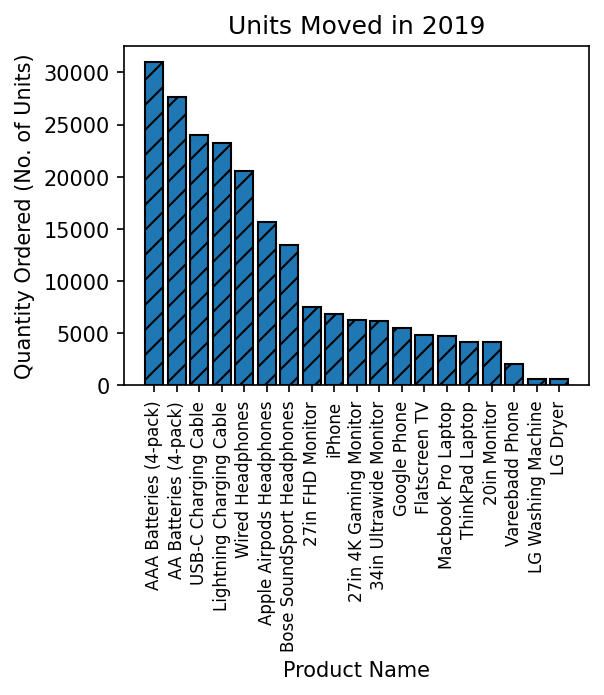

In [54]:
plt.figure(figsize=(4, 3), dpi=150)

X_AXIS_VALUES = answer["Product"].unique()

bar_plot = plt.bar(X_AXIS_VALUES, answer["Quantity Ordered"], edgecolor="black", linewidth=1)

for bar in bar_plot:
    bar.set_hatch("//")

plt.xticks(X_AXIS_VALUES, rotation="vertical", size=8)

plt.ylabel("Quantity Ordered (No. of Units)")    
plt.xlabel("Product Name")

plt.title("Units Moved in 2019")

plt.show()

The hottest selling item is AAA Batteries (4-pack)

**Note:** The mean of the `Price Each` column is the actual price of 1 unit of that product

In [55]:
prices = all_months_data.groupby("Product").mean()["Price Each"]

prices.shape

(19,)

In [56]:
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

In [57]:
all_months_data[["Product", "Quantity Ordered", "Price Each"]].loc[all_months_data["Quantity Ordered"] == 1] \
                                                              .drop_duplicates().reset_index(drop=True)

,Product,Quantity Ordered,Price Each
0,USB-C Charging Cable,1,11.95
1,Macbook Pro Laptop,1,1700.00
2,ThinkPad Laptop,1,999.99
3,27in FHD Monitor,1,149.99
4,Bose SoundSport Headphones,1,99.99
5,Apple Airpods Headphones,1,150.00
6,Lightning Charging Cable,1,14.95
7,Wired Headphones,1,11.99
8,Flatscreen TV,1,300.00
9,AA Batteries (4-pack),1,3.84


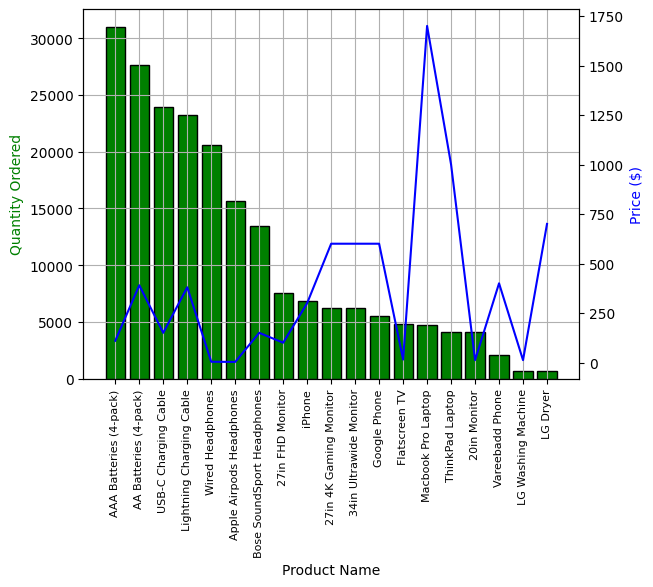

In [58]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

prices = all_months_data.groupby('Product').mean()['Price Each']
products = answer["Product"].unique()

plt.style.use('default') # using the fivethirtyeight matplotlib theme

fig, ax1 = plt.subplots()

ax2 = ax1.twinx() # set up the 2nd axis
ax1.bar(products, answer["Quantity Ordered"], color='g', edgecolor="black", linewidth=1)
ax1.grid()

ax2.plot(products, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')

# This is required for set_xticklabels() to work error free
ax1.axes.set_xticks([i for i in range(19)])
ax1.axes.set_xticklabels(products, rotation='vertical', size=8)

plt.show()

#### Inference Based on Data

Based on the above chart, we can see that cheaper items are frequently purchased while we observe the opposite concerning more expensive items. This positive correlation is absent in a few products such as the "Macbook Pro Laptop" and "ThinkPad Laptop". This exception could be described by arguing that maybe the store's visitors are primarily comprised of students or working professionals who need laptops.

---